<a href="https://colab.research.google.com/github/mohamedyosef101/harvardx-python-for-research/blob/main/Network%20Analysis/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basics of NetworkX

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import bernoulli
from collections import Counter

In [9]:
G = nx.Graph()
G.add_node(1)
G.add_nodes_from([2, 3])
G.add_nodes_from(['u', 'v'])
G.nodes()

NodeView((1, 2, 3, 'u', 'v'))

In [12]:
G.add_edge(1, 2)
G.add_edge('u', 'v')
G.add_edges_from([(1, 3), (1, 4), (1, 5), (1, 6)])
G.add_edge('u', 'w')
print(f"There are {G.number_of_edges()} edges \n{G.edges()}")

There are 7 edges 
[(1, 3), (1, 6), (1, 2), (1, 4), (1, 5), ('u', 'v'), ('u', 'w')]


In [13]:
G.remove_node(2)
G.remove_nodes_from([4, 5])
# same with edges
G.nodes(), G.number_of_nodes()

(NodeView((1, 3, 'u', 'v', 6, 'w')), 6)

# Graph Visualization

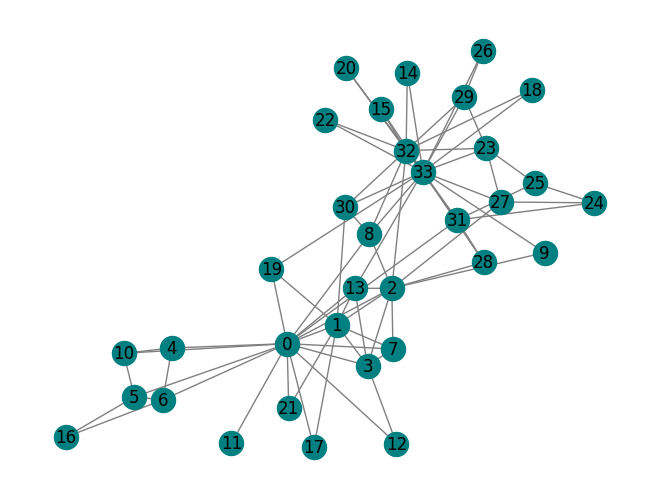

In [15]:
G = nx.karate_club_graph()
nx.draw(G, with_labels=True, node_color='teal', edge_color='gray')
# plt.savefig("karate_graph.pdf")

In [16]:
G.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

In [17]:
G.degree()[33]

17

In [18]:
G.degree(33)

17

# Random Graphs

In [20]:
bernoulli.rvs(p=0.2) # repeat it many times

0

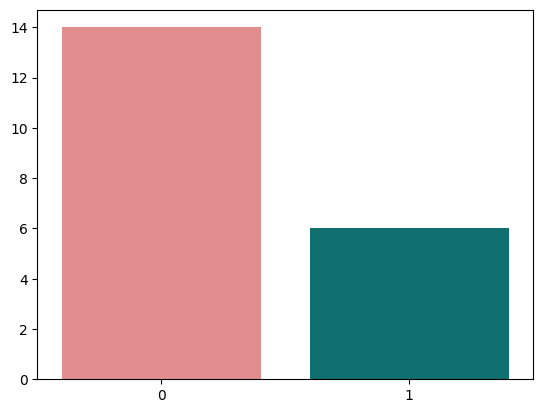

In [36]:
res = []
for i in range(0, 20):
  res.append(bernoulli.rvs(p=0.2))
  i += 1
counter = Counter(res)
sns.barplot(x=counter.keys(),
    hue=counter.keys(), y=counter.values(),
    palette=['lightcoral', 'teal'], legend=False)
plt.show()

## Erdos-Renyi (ER)
- create empty graph
- add all N nodes in the graph
- loop over all pairs of nodes
  - add an edge with probability p

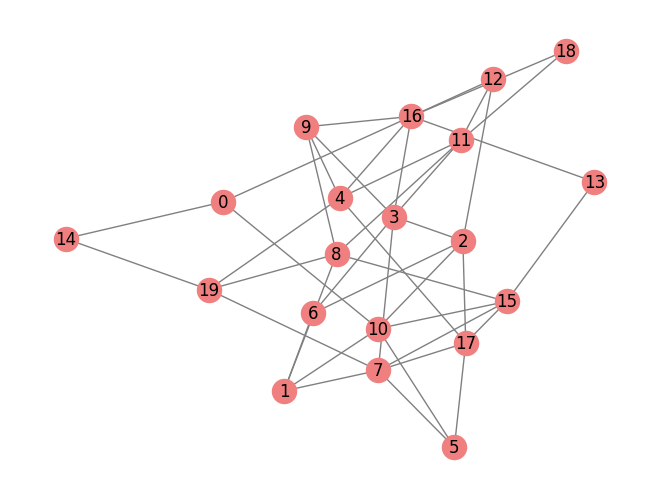

In [40]:
def er_graph(N, p):
  """
  Generate an ER graph.
  """
  g = nx.Graph()
  g.add_nodes_from(range(N))
  for i in g.nodes():
    for j in g.nodes():
      if i < j and bernoulli.rvs(p=p):
        g.add_edge(i, j)
  return g

N = 20
p = 0.2
g = er_graph(N, p)
nx.draw(g, with_labels=True, node_color='lightcoral', edge_color='gray')

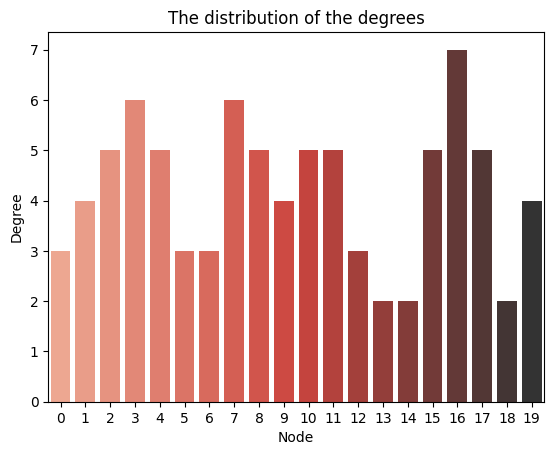

In [54]:
# plot the degree distribution for the ER graph
D = dict(g.degree())
sns.barplot(x=D.keys(), hue=D.keys(), y=D.values(), palette='Reds_d', legend=False)
plt.title("The distribution of the degrees")
plt.xlabel("Node")
plt.ylabel("Degree")
plt.show()

# Descriptive Statistics of Emprical Social Networks